# 1.Data loading


In [2]:
import pandas as pd
import numpy as np
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

data = pd.read_csv("D:/桌面/Online Retail.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# 2.Data Cleaning

In [4]:
data = data.dropna(subset=['CustomerID'])
data = data.drop_duplicates()
data = data[data['UnitPrice'] > 0]
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

data.info()
print(f"The cleansed dataset contains {data.shape[0]} records")

cleaned_file_path = 'OnlineRetail_Cleaned.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"The cleaned data has been saved to {cleaned_file_path}")

returns = data[data['Quantity'] < 0]
returns_file_path = 'OnlineRetail_Returns.csv'
returns.to_csv(returns_file_path, index=False)
print(f"The returns data has been saved to {returns_file_path}")

<class 'pandas.core.frame.DataFrame'>
Index: 401564 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401564 non-null  object 
 1   StockCode    401564 non-null  object 
 2   Description  401564 non-null  object 
 3   Quantity     401564 non-null  int64  
 4   InvoiceDate  401564 non-null  object 
 5   UnitPrice    401564 non-null  float64
 6   CustomerID   401564 non-null  float64
 7   Country      401564 non-null  object 
 8   TotalPrice   401564 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 30.6+ MB
The cleansed dataset contains 401564 records
The cleaned data has been saved to OnlineRetail_Cleaned.csv
The returns data has been saved to OnlineRetail_Returns.csv


# 3.EDA

3.1 Sales trend analysis

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Monthly Sales Trend')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Total Sales (£)')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2010-12'),
  Text(1, 0, '2011-01'),
  Text(2, 0, '2011-02'),
  Text(3, 0, '2011-03'),
  Text(4, 0, '2011-04'),
  Text(5, 0, '2011-05'),
  Text(6, 0, '2011-06'),
  Text(7, 0, '2011-07'),
  Text(8, 0, '2011-08'),
  Text(9, 0, '2011-09'),
  Text(10, 0, '2011-10'),
  Text(11, 0, '2011-11'),
  Text(12, 0, '2011-12')])

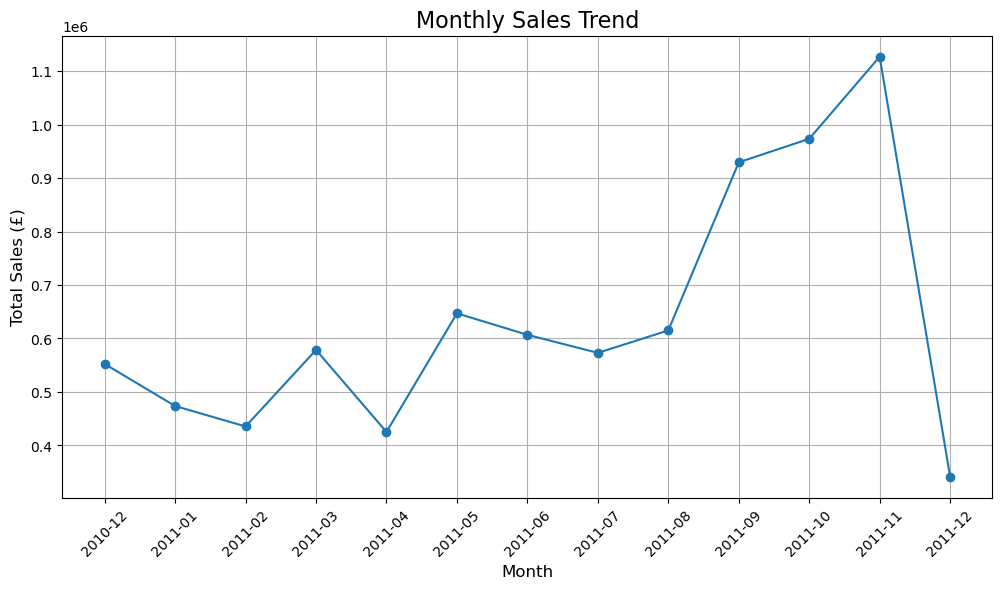

In [7]:
import matplotlib.pyplot as plt

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Summarize sales by month
data['Month'] = data['InvoiceDate'].dt.to_period('M')
monthly_sales = data.groupby('Month')['TotalPrice'].sum().reset_index()

# Visualize sales trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['TotalPrice'], marker='o')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (£)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


3.2 Country distribution

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Country'>

Text(0.5, 1.0, 'Top 10 Countries by Total Sales')

Text(0.5, 0, 'Country')

Text(0, 0.5, 'Total Sales (£)')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'Netherlands'),
  Text(2, 0, 'EIRE'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Australia'),
  Text(6, 0, 'Switzerland'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'Belgium'),
  Text(9, 0, 'Sweden')])

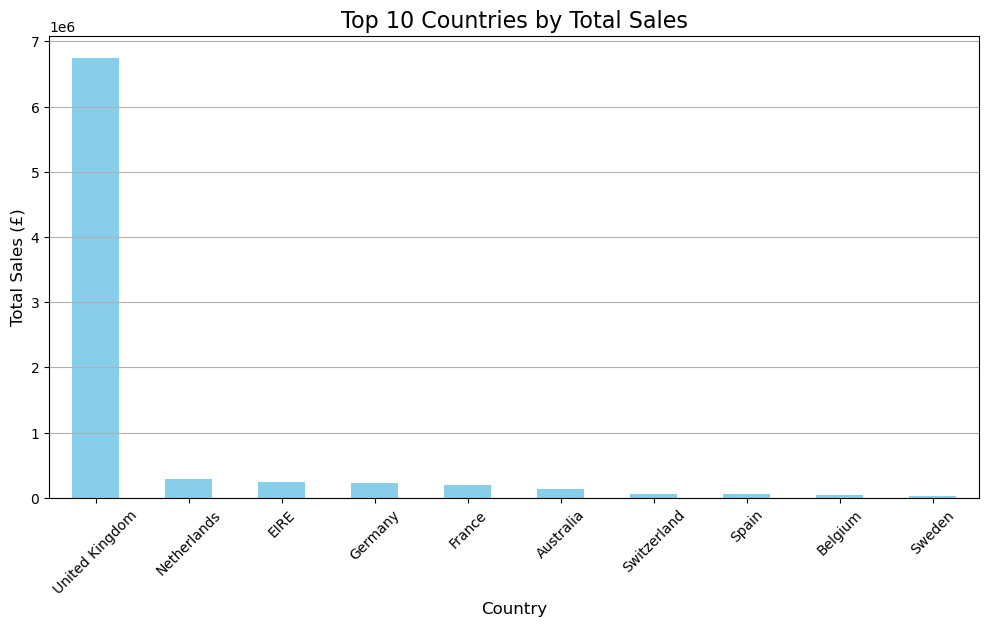

In [9]:
# Summarize sales by country
country_sales = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# Draw a bar chart of the top 10 countries
top_10_countries = country_sales.head(10)

plt.figure(figsize=(12, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Total Sales', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales (£)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


3.3 Best-selling product analysis

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Description'>

Text(0.5, 1.0, 'Top 10 Products by Quantity Sold')

Text(0.5, 0, 'Product Description')

Text(0, 0.5, 'Quantity Sold')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'WORLD WAR 2 GLIDERS ASSTD DESIGNS'),
  Text(1, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(2, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(3, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(4, 0, 'PACK OF 72 RETROSPOT CAKE CASES'),
  Text(5, 0, 'POPCORN HOLDER'),
  Text(6, 0, 'RABBIT NIGHT LIGHT'),
  Text(7, 0, 'MINI PAINT SET VINTAGE '),
  Text(8, 0, 'PACK OF 12 LONDON TISSUES '),
  Text(9, 0, 'PACK OF 60 PINK PAISLEY CAKE CASES')])

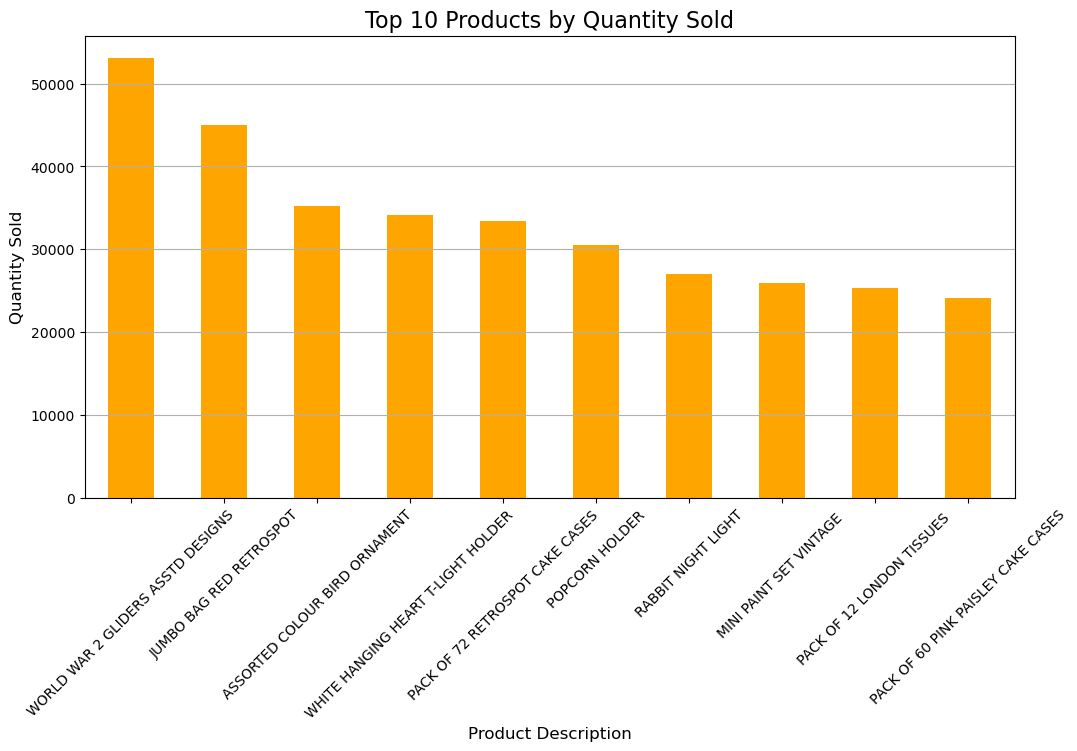

In [12]:
# Summarize sales volume and revenue by product description
product_sales = data.groupby('Description').agg({'Quantity': 'sum', 'TotalPrice': 'sum'}).sort_values(by='Quantity', ascending=False)

# Top 10 Products
top_10_quantity = product_sales.head(10)

plt.figure(figsize=(12, 6))
top_10_quantity['Quantity'].plot(kind='bar', color='orange')
plt.title('Top 10 Products by Quantity Sold', fontsize=16)
plt.xlabel('Product Description', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


3.4 Customer Behavior Analysis

<Figure size 1200x600 with 0 Axes>

(array([227., 557., 485., 381., 275., 283., 210., 151., 141., 137.,  93.,
        110.,  86.,  74.,  70.,  66.,  71.,  44.,  54.,  48.,  36.,  37.,
         33.,  38.,  38.,  21.,  29.,  23.,  23.,  19.,  21.,  21.,  19.,
         21.,  19.,  17.,  14.,   9.,   9.,  11.,   7.,  11.,   9.,  10.,
          9.,  11.,   2.,   8.,   5.,  12.]),
 array([1.77635684e-15, 1.12268600e+02, 2.24537200e+02, 3.36805800e+02,
        4.49074400e+02, 5.61343000e+02, 6.73611600e+02, 7.85880200e+02,
        8.98148800e+02, 1.01041740e+03, 1.12268600e+03, 1.23495460e+03,
        1.34722320e+03, 1.45949180e+03, 1.57176040e+03, 1.68402900e+03,
        1.79629760e+03, 1.90856620e+03, 2.02083480e+03, 2.13310340e+03,
        2.24537200e+03, 2.35764060e+03, 2.46990920e+03, 2.58217780e+03,
        2.69444640e+03, 2.80671500e+03, 2.91898360e+03, 3.03125220e+03,
        3.14352080e+03, 3.25578940e+03, 3.36805800e+03, 3.48032660e+03,
        3.59259520e+03, 3.70486380e+03, 3.81713240e+03, 3.92940100e+03,
        4.

Text(0.5, 1.0, 'Customer Spend Distribution (Filtered)')

Text(0.5, 0, 'Total Spend (£)')

Text(0, 0.5, 'Number of Customers')

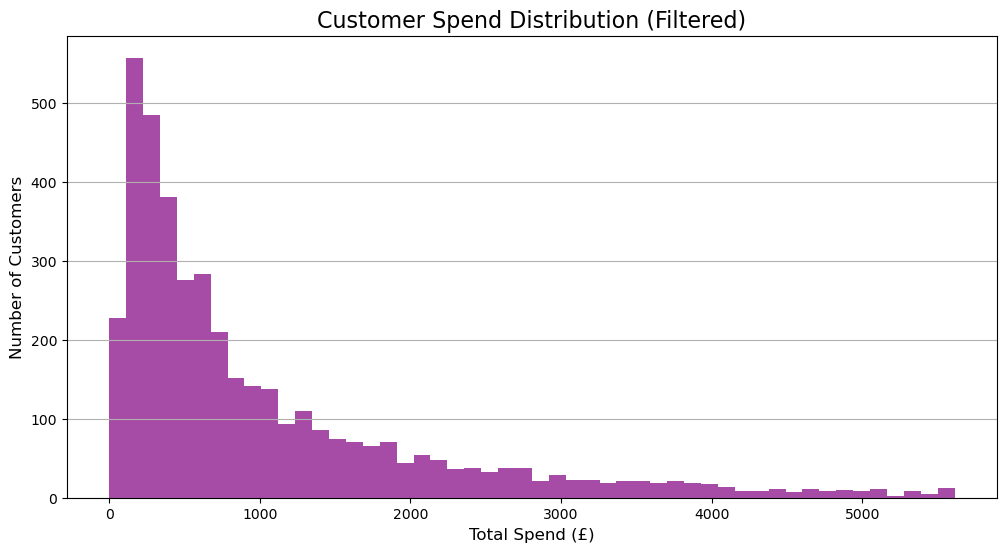

In [14]:
customer_behavior = data.groupby('CustomerID').agg({
    'TotalPrice': 'sum',  
    'InvoiceNo': 'nunique'  
}).rename(columns={'TotalPrice': 'TotalSpend', 'InvoiceNo': 'PurchaseCount'})

customer_behavior = customer_behavior[customer_behavior['TotalSpend'] > 0]

# Handle outliers and set the upper limit to the 95% quantile of TotalSpend
upper_limit = customer_behavior['TotalSpend'].quantile(0.95)
customer_behavior_filtered = customer_behavior[customer_behavior['TotalSpend'] <= upper_limit]

plt.figure(figsize=(12, 6))
plt.hist(customer_behavior_filtered['TotalSpend'], bins=50, color='purple', alpha=0.7)
plt.title('Customer Spend Distribution (Filtered)', fontsize=16)
plt.xlabel('Total Spend (£)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(axis='y')
plt.show()

# 4.Further Analysis

4.1 Identifying high-value customers (RFM model)

In [17]:
from datetime import datetime

# Set a reference date (such as the last date of the dataset)
reference_date = data['InvoiceDate'].max()

# Calculate the RFM values
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'  # Monetary
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


4.2 Return behavior analysis

Description
MEDIUM CERAMIC TOP STORAGE JAR       21.769141
SET OF 3 BABUSHKA STACKING TINS      21.250000
WHITE ENAMEL FLOWER HAIR TIE          6.000000
PINK FOXGLOVE ARTIIFCIAL FLOWER       6.000000
GREEN ENAMEL FLOWER HAIR TIE          6.000000
PANTRY CHOPPING BOARD                 4.927083
BLACK DIAMANTE EXPANDABLE RING        3.200000
GOLDIE LOOKING MIRROR                 3.000000
BUTTERFLY HAIR BAND                   3.000000
DIAMANTE HAIR GRIP PACK/2 MONTANA     3.000000
Name: Quantity, dtype: float64


<Axes: xlabel='Description'>

Text(0.5, 1.0, 'Top 10 Products by Return Rate')

Text(0.5, 0, 'Product Description')

Text(0, 0.5, 'Return Rate')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'MEDIUM CERAMIC TOP STORAGE JAR'),
  Text(1, 0, 'SET OF 3 BABUSHKA STACKING TINS'),
  Text(2, 0, 'WHITE ENAMEL FLOWER HAIR TIE'),
  Text(3, 0, 'PINK FOXGLOVE ARTIIFCIAL FLOWER'),
  Text(4, 0, 'GREEN ENAMEL FLOWER HAIR TIE'),
  Text(5, 0, 'PANTRY CHOPPING BOARD'),
  Text(6, 0, 'BLACK DIAMANTE EXPANDABLE RING'),
  Text(7, 0, 'GOLDIE LOOKING MIRROR'),
  Text(8, 0, 'BUTTERFLY HAIR BAND'),
  Text(9, 0, 'DIAMANTE HAIR GRIP PACK/2 MONTANA')])

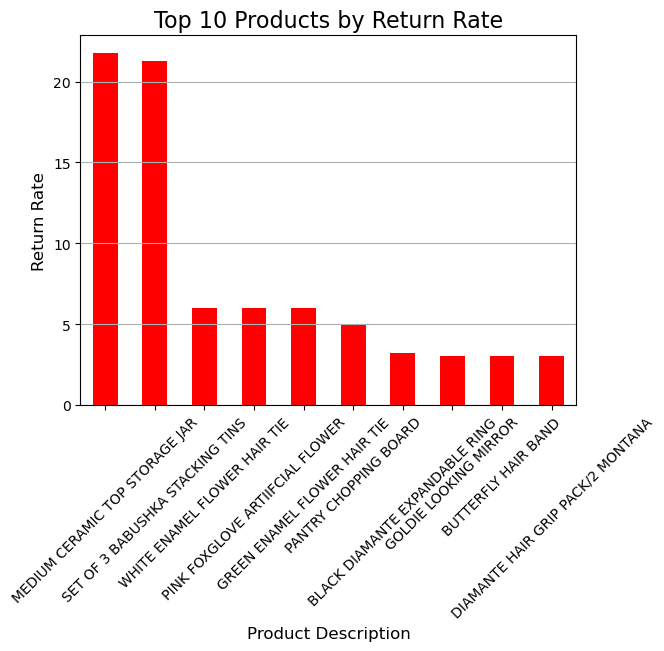

In [19]:
returns_quantity = returns.groupby('Description')['Quantity'].sum().abs()
total_quantity = data.groupby('Description')['Quantity'].sum()
valid_products = total_quantity[total_quantity > 0]

# Calculate Return Rate
return_rate = (returns_quantity / valid_products).fillna(0).sort_values(ascending=False)
print(return_rate.head(10))

return_rate.head(10).plot(kind='bar', color='red')
plt.title('Top 10 Products by Return Rate', fontsize=16)
plt.xlabel('Product Description', fontsize=12)
plt.ylabel('Return Rate', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 5.In-depth strategic optimization analysis

5.1 High-value customer analysis and strategy offers.

- Finding:
From RFM data, we found that: 1.High-value customers (low Recency, high Frequency and Monetary) require targeted promotion strategies. 2.Low-frequency customers or recently inactive customers can be recalled through promotion incentives.

- Strategy recommendations:
1.Design exclusive discounts for customers with a Recency value of less than 30 days and high Monetary (loyal customers).
2.For customers with high Recency values ​​and low Frequency (churned customers), send special limited-time offers.

In [23]:
# Add customer category
rfm['CustomerSegment'] = pd.qcut(rfm['Monetary'], 4, labels=['Low', 'Mid', 'High', 'Very High'])

# Output high-value customers
high_value_customers = rfm[(rfm['Recency'] <= 30) & (rfm['CustomerSegment'] == 'Very High')]
print(high_value_customers)

            Recency  Frequency  Monetary CustomerSegment
CustomerID                                              
12347.0           1          7   4310.00       Very High
12349.0          18          1   1757.55       Very High
12356.0          22          3   2811.43       Very High
12359.0           7          6   6182.98       Very High
12362.0           2         13   5154.58       Very High
...             ...        ...       ...             ...
18241.0           9         18   2058.09       Very High
18245.0           6          8   2507.56       Very High
18259.0          24          3   2338.60       Very High
18272.0           2          7   3064.78       Very High
18283.0           3         16   2045.53       Very High

[744 rows x 4 columns]


5.2 Optimize return behavior

- Finding: From the return rate data, we found that:
1.Some products have a high return rate (such as the product described in the screenshot, which may need to be checked for inventory or quality issues).
2.For countries with more return data, the return policy needs to be optimized.

- Strategy recommendations:
1.For products with high return rates, optimize inventory and product design.
2.Design more flexible return policies for countries with frequent returns (such as extending the return period or providing free returns).

In [26]:
monthly_sales.to_csv('monthly_sales.csv', index=False)
country_sales.to_csv('country_sales.csv', index=True)
top_10_quantity.to_csv('top_10_quantity.csv', index=True)
rfm.to_csv('rfm_data.csv', index=True)
return_rate.to_csv('product_returns.csv', index=True, sep=',', encoding='utf-8')

In [28]:
customer_behavior.to_csv('customer_behavior.csv', index=True)